## Xgboost模型
### 模型设计


In [14]:
import sys
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import operator
from matplotlib import pylab as plt
from datetime import datetime
import time
from sklearn.model_selection import GridSearchCV

In [15]:
data = pd.read_csv('train_set.csv')
data.head()

,user_id,sku_id,cate,action_before_3_1.0_x,action_before_3_2.0_x,action_before_3_3.0_x,action_before_3_4.0_x,action_before_3_5.0_x,action_before_3_6.0_x,action_before_3_1.0_y,...,cate_action_5_mean,cate_action_6_mean,has_bad_comment,bad_comment_rate,comment_num_0,comment_num_1,comment_num_2,comment_num_3,comment_num_4,label
0,202633,12564,8,3,0,0,0,0,6,3,...,62.6,15502.8,1,0.0260,0,0,0,0,1,1
1,218498,149854,8,12,0,0,0,0,12,6,...,62.6,15502.8,1,0.0403,0,0,0,0,1,1
2,221842,75877,8,9,0,0,0,0,15,237,...,62.6,15502.8,1,0.0245,0,0,0,0,1,1
3,222886,154636,8,60,3,0,0,0,78,30,...,62.6,15502.8,1,0.0208,0,0,0,0,1,1
4,235240,38222,8,90,3,0,0,0,84,165,...,62.6,15502.8,1,0.0166,0,0,0,0,1,1


In [16]:
data.columns

Index(['user_id', 'sku_id', 'cate', 'action_before_3_1.0_x',
       'action_before_3_2.0_x', 'action_before_3_3.0_x',
       'action_before_3_4.0_x', 'action_before_3_5.0_x',
       'action_before_3_6.0_x', 'action_before_3_1.0_y',
       ...
       'cate_action_5_mean', 'cate_action_6_mean', 'has_bad_comment',
       'bad_comment_rate', 'comment_num_0', 'comment_num_1', 'comment_num_2',
       'comment_num_3', 'comment_num_4', 'label'],
      dtype='object', length=251)

In [17]:
data_x = data.loc[:,data.columns != 'label']
data_y = data.loc[:,data.columns == 'label']

In [18]:
data_x.head()

,user_id,sku_id,cate,action_before_3_1.0_x,action_before_3_2.0_x,action_before_3_3.0_x,action_before_3_4.0_x,action_before_3_5.0_x,action_before_3_6.0_x,action_before_3_1.0_y,...,cate_action_4_mean,cate_action_5_mean,cate_action_6_mean,has_bad_comment,bad_comment_rate,comment_num_0,comment_num_1,comment_num_2,comment_num_3,comment_num_4
0,202633,12564,8,3,0,0,0,0,6,3,...,25.2,62.6,15502.8,1,0.0260,0,0,0,0,1
1,218498,149854,8,12,0,0,0,0,12,6,...,25.2,62.6,15502.8,1,0.0403,0,0,0,0,1
2,221842,75877,8,9,0,0,0,0,15,237,...,25.2,62.6,15502.8,1,0.0245,0,0,0,0,1
3,222886,154636,8,60,3,0,0,0,78,30,...,25.2,62.6,15502.8,1,0.0208,0,0,0,0,1
4,235240,38222,8,90,3,0,0,0,84,165,...,25.2,62.6,15502.8,1,0.0166,0,0,0,0,1


In [19]:
data_y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [20]:
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size = 0.2, random_state = 0)

In [21]:
x_test.shape

(2924, 250)

In [22]:
x_val = x_test.iloc[:1500,:]
y_val = y_test.iloc[:1500,:]

x_test = x_test.iloc[1500:,:] 
y_test = y_test.iloc[1500:,:]

In [23]:
x_val.shape
x_test.shape

(1424, 250)

In [24]:
del x_train['user_id']
del x_train['sku_id']

del x_val['user_id']
del x_val['sku_id']

x_train.head()

,cate,action_before_3_1.0_x,action_before_3_2.0_x,action_before_3_3.0_x,action_before_3_4.0_x,action_before_3_5.0_x,action_before_3_6.0_x,action_before_3_1.0_y,action_before_3_2.0_y,action_before_3_3.0_y,...,cate_action_4_mean,cate_action_5_mean,cate_action_6_mean,has_bad_comment,bad_comment_rate,comment_num_0,comment_num_1,comment_num_2,comment_num_3,comment_num_4
2157,4,27,3,0,0,0,57,75,3,0,...,75.9,156.4,48336.1,1,0.0353,0,0,0,0,1
2464,7,6,0,0,0,0,9,12,0,0,...,28.0,58.6,16313.8,1,0.0518,0,0,0,0,1
10326,10,3,0,0,0,0,0,0,0,0,...,3.3,27.0,7084.8,0,0.0000,0,0,0,1,0
7025,8,3,0,0,0,0,0,75,6,0,...,77.2,350.4,74828.0,1,0.0237,0,0,0,0,1
6625,8,6,0,0,0,0,9,72,0,0,...,77.2,350.4,74828.0,1,0.0317,0,0,0,0,1


In [ ]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dvalid = xgb.DMatrix(x_val, label=y_val)

In [ ]:
param = {'n_estimators': 4000, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0, 'subsample': 1.0, 
             'colsample_bytree': 0.8, 'scale_pos_weight':10, 'eta': 0.1, 'silent': 1, 'objective': 'binary:logistic',
             'eval_metric':'auc'}

In [ ]:
num_round = param['n_estimators']

plst = param.items()
evallist = [(dtrain, 'train'), (dvalid, 'eval')]
bst = xgb.train(plst, dtrain, num_round, evallist, early_stopping_rounds=10)
bst.save_model('bst.model')

In [ ]:
def create_feature_map(features):
    outfile = open(r'xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()


features = list(x_train.columns[:])
create_feature_map(features)


In [ ]:
def feature_importance(bst_xgb):
    importance = bst_xgb.get_fscore(fmap=r'xgb.fmap')
    importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)

    df = pd.DataFrame(importance, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()
    file_name = 'feature_importance_' + str(datetime.now().date())[5:] + '.csv'
    df.to_csv(file_name)

feature_importance(bst)


In [ ]:
fi = pd.read_csv('feature_importance_10-24.csv')
fi.sort_values("fscore", inplace=True, ascending=False)
fi.head()

In [ ]:
pos, neg = 0,0
for user_id in all_user_test_set:
    if user_id in all_user_set:
        pos += 1
    else:
        neg += 1
all_user_acc = 1.0 * pos / ( pos + neg)
all_user_recall = 1.0 * pos / len(all_user_set)
print ('所有商品中预测购买用户的准确率为 ' + str(all_user_acc))
print ('所有商品中预测购买用户的召回率' + str(all_user_recall))


In [ ]:
#所有实际商品对
all_user_item_pair = x_test[x_test['true_label']==1]['user_id'].map(str) + '-' + x_test[x_test['true_label']==1]['sku_id'].map(str)
all_user_item_pair = np.array(all_user_item_pair)
#print (len(all_user_item_pair))
#print(all_user_item_pair)
pos, neg = 0, 0
for user_item_pair in all_user_test_item_pair:
    #print (user_item_pair)
    if user_item_pair in all_user_item_pair:
        pos += 1
    else:
        neg += 1
all_item_acc = 1.0 * pos / ( pos + neg)
all_item_recall = 1.0 * pos / len(all_user_item_pair)
print ('所有用户中预测购买商品的准确率为 ' + str(all_item_acc))
print ('所有用户中预测购买商品的召回率' + str(all_item_recall))
F11 = 6.0 * all_user_recall * all_user_acc / (5.0 * all_user_recall + all_user_acc)
F12 = 5.0 * all_item_acc * all_item_recall / (2.0 * all_item_recall + 3 * all_item_acc)
score = 0.4 * F11 + 0.6 * F12
print ('F11=' + str(F11))
print ('F12=' + str(F12))
print ('score=' + str(score))


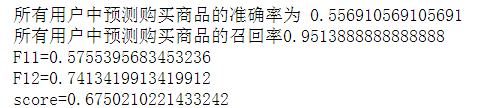